After the not so good return of investment (ROI) from his casino, Ivan decided to use the *power of the social networks* (he heard that from the radio at the gas station while filling the 50 litres LPG bottle of his 300+ HP BMW) to provide a fresh influx of cash and clients for his new business. But which customers will help his business grow? Which one will *follow him* (another fancy term he heard from his fitness instructor)?

Ivan is lucky enough to live in a country where good developers are willing to receive suboptimal payment for their service. So he contacted a small company and started the discussion with the following: "Brothers, how much do you want for 10,000 customers each of which will lose 1000USD at my casino?". The developers were dazzled. Which of their friends was behind this prank? Gradually, they dismissed the hypothesis altogether - no one was capable of than one. After discussing the matter for a week, the developers convinced Ivan that they can start with clustering a set of **Twitter** accounts and exploring their features. Ivan was so happy that the negotiations ended and thanked the boys with a smile on his face (probably because he was too drunk for anything else).

# Clustering

The clustering problem can be defined as follows: Given n objects, assign them to groups (called clusters) based on their properties, so that objects in one group (group) are more similar to each other than objects in other groups (clusters). So what is a cluster? Just a group of objects.

## Why cluster?

Humans like to put objects into conceptually meaningful groups/classes. Biologists have spent many years creating a taxonomy (hierarchical classification) of all living things. [See the Tree of Life](http://www.members.optusnet.com.au/~gdlt/ScienceUnit/ScienceFiles/Tree%20of%20Life.jpg) for interesting example. Even small children can group objects in a photographs as buildings, vehicles, animals etc. It is often easier to think of multiple objects as one, just a simple way to compress a lot of information.

Clusters are potential classes of objects and cluster analysis is the study of techniques for automatically finding classes.

## Where clustering is used?

* Biology - automatically find classification structure of all living things
* Information Retrieval - group a set of news articles based on their similarity/category (e.g. sports, politics etc)
* Business - segment customers into a small number of groups for additional analysis and marketing activities (sounds familiar?)

## Is clustering even possible?

Turns out that clustering is pretty hard, even impossible in its strict form. If you are willing to go the extra mile, visit these: [What is clustering and why is it hard?](http://alexhwilliams.info/itsneuronalblog/2015/09/11/clustering1/) and [An Impossibility Theorem for Clustering](https://web.stanford.edu/~rezab/classes/cme305/W15/Notes/Kleinberg%20-%20impossibility%20theorem.pdf).

Informally Kleinberg outlines the following desired properties for a clustering function:

* Scale-Invariance: If we transform the data so that everything is stretched out equally in all directions, then the clustering result shouldn’t change. (Meters vs inches)

* Consistency: If we stretch the data so that the distances between clusters increases and/or the distances within clusters decreases, then the clustering shouldn’t change.

* Richness: The clustering function should theoretically be able to produce any arbitrary partition/clustering of datapoints (in the absence of knowing the pairwise distance between any two points). (All partitions are possible solutions)

A picture can do better:

<img src="http://alexhwilliams.info/itsneuronalblog/img/clustering/impossibility-intuition.png" style="width: 480px;">

<h5 align="center">Image courtesy of <a href="http://alexhwilliams.info/itsneuronalblog" target="_blank">Alex Williams</a></h5>

For a succint explanation of the above diagram go [here](http://stats.stackexchange.com/a/175229).

So can we do it in practice? The short answer is **yes** but certain heuristics must be used and the analysis can go **wrong**.

## How many clusters?

Interesting question, isn't it? Especially if the problem is posed as an unsupervised one. This might the most widely understood problem with clustering. So here is a question:

<img src="http://alexhwilliams.info/itsneuronalblog/img/clustering/clustering_ambiguity.png" style="width: 480px;">

<h5 align="center">Image courtesy of <a href="http://alexhwilliams.info/itsneuronalblog" target="_blank">Alex Williams</a></h5>

Still, no need to despair. While not being solved, this one can be delt with, as well. One informal and naive method is *The Elbow Method* which looks for clustering that explains most of the variance of the data with the fewest clusters.

## Clustering meta-algorithm

1. Compare the similarity of all pairs of objects
2. Group the most similar ones together into clusters
3. Evaluate the resulting clusters

## Types of clustering

Clustering algorithms can be categorized (clustered?) based on their cluster model. Only two of those models are described here (for more look at [Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)):

* Connectivity models: builds models based on distance metric (e.g. hierarchical clustering)
* Centroid models: each cluster is represented as a central vector (e.g. k-means clustering)

### Hierarchical clustering

Hierarchical clustering (also known as Connectivity-based clustering) are based on the idea that objects that are closer to each other are more similar than those that are further away.

Those kind of algorithms output a tree of which the leaves are data points and branching points represent similarity between sub-trees. The clusters are produced by horizontal cuts of the tree. The output diagram of hierachical clustering is called *Dendogram*. Here is an example of one:

<img src="https://upload.wikimedia.org/wikibooks/en/2/28/Agglomerative_clustering_dendogram.png" style="width: 480px;">

<h5 align="center">Image courtesy of <a href="https://en.wikibooks.org/wiki/Data_Mining_Algorithms_In_R" target="_blank">Data Mining Algorithms In R</a></h5>

#### General algorithm

1. Place each element in its own cluster, $C_i=\{X_i\}$
2. **repeat**
3. &nbsp;&nbsp; Compute (update) the merging cost between every pair of elements in the set of clusters to find the two cheapest clusters to merge $C_i, C_j$
4. &nbsp;&nbsp; Merge $C_i$ and $C_j$ in a new cluster $C_{ij}$ which is the parent of $C_i$ and $C_j$ in the tree
5. **until** a single set remains

#### Types of algorithms based on merging cost

* Single Link $\min\limits_{x \in C_i, y \in C_j}d(x,y)$
* Average Link $\frac{1}{|C_i||C_j|}\sum_{x \in C_j}\sum_{y \in C_j}d(x, y)$
* Complete Link $\max\limits_{x \in C_i, y \in C_j}d(x,y)$

#### Drawbacks of hierarchical clustering algorithms

* Will not produce unique partitioning for a given dataset
* The user has to choose appropriate clusters
* Not robust to outliers
* Suffer from local optima

### Centroid-based clustering

Clusters are represented by their centers as a vector (centers might not be members of the data set). With fixed number of clusters *k* an optimization problem can be defined: find the k cluster centers and assign the objects to the nearest cluster center, such that the squared distances from the cluster are minimized. More fomarlly for the *K*  clusters $C_k$ and the *K* centroids $\mu_k$:

$$ Minimize \sum_{k=1}^K\sum_{X_n \in C_k} \|X_n - \mu_k\|^2 \, with \, respect \, to \, C_k, \mu_k$$

This problem is NP-hard, thus we may only find (currently) approximate solutions.

#### K-means algorithm

This algorithm requires as input *data* and the number of clusters *K* and it is pretty simple to describe/implement. We first choose the *K* initial centroids. Each point from the data set is then assigned to a cluster based on proximity.

##### Algorithm

1. Select K points as initial centroids
2. **repeat**
3. &nbsp;&nbsp; Form K clusters by assigning each point to its closest centroid
4. &nbsp;&nbsp; Recompute the centroid of each cluster
5. **until** Centroids do not change

Step *3* and *4* can be expressed as the following:

$$C_k = \{X_n : \| X_n - \mu_k \| \leq all\, \|X_n - \mu_k \| \}$$

$$\mu_k=\frac{1}{C_k}\sum_{X_n \in C_k}X_n$$

##### Implementation

The above definition of the algorithm has some pretty vague points. Select K points as initial centroids? Closest centroid?

We will use the [Lloyd's algorithm](https://en.wikipedia.org/wiki/Lloyd%27s_algorithm) to implement K-means. One known limitation is that this algorithm converges to a local minimum, but it is simple to illustrate a point and runs pretty quickly.

We will use simple euclidean distance proximity metric (feel free to change it with something else).

In [201]:
import numpy as np
import random

def init_centroids(data, k):
    '''Randomly choose k centroids.'''
    return data[np.random.choice(data.shape[0], size=(k,))]

def distance_to_centroids(x, centroids):
    """
    Euclidian distance between a data point and each cluster
    """
    return np.sum((np.power((x - centroids), 2)), 1)

def assign_centroids(data, centroids):
    result = np.zeros((len(data) , 1))
    for i, d in enumerate(data):
        distance = distance_to_centroids(d, centroids)
        # Find the closest center
        result[i] = np.where(distance==min(distance))[0][0]
    return result

def new_centroids(data, clusters, k):
    centroids = []
    for i in range(k):
        rows_in_centroid_mask = np.equal(clusters, i)
        rows_in_centroid = sum(rows_in_centroid_mask)
        data_in_centroid = sum(np.multiply(rows_in_centroid_mask, data))
        centroids.append(data_in_centroid / rows_in_centroid)
    return centroids

def k_means(data, k, iterations):
    centroids = init_centroids(data, k)
    for _ in range(iterations):
        clusters = assign_centroids(data, centroids)
        centroids = new_centroids(data, clusters, k)
    clusters = assign_centroids(data, centroids).flatten().tolist()
    clusters = [int(c) for c in clusters]
    return (centroids, clusters)

Now let's try it out on the [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/Iris). This dataset contains 3 classes. So will set $k = 3$.

In [203]:
from collections import Counter

def load_data():
    data = [l.strip() for l in open('data/iris.data') if l.strip()]
    features = [tuple(map(float, x.split(',')[:-1])) for x in data]
    labels = [x.split(',')[-1] for x in data]
    return dict(zip(features, labels))

k = 3 # number of clusters
iterations = 1000 # when the algorithm should stop

data = load_data()
features = list(data.keys())
random.seed(1)
random.shuffle(features)
X_norm = normalize(features)

centroids, clusters = k_means(X_norm, k, iterations)

print(Counter(data.values()))
print(Counter(clusters))

Counter({'Iris-versicolor': 50, 'Iris-virginica': 49, 'Iris-setosa': 48})
Counter({0: 51, 1: 48, 2: 48})


Not bad for a couple of lines of code. Might it be we were just lucky or the data set was too easy?

#### Drawbacks of K-means

* The number of clusters must be known in advance
* Sensitive to changes/disturbances
* Clusters are formed without indication of relationships among them
* Results depend on initial choice of centers

## Evaluating the results

In [204]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
import json
from datetime import date

plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore')

In [205]:
f = open("data/twitter_users.json", "r")
text = f.read()
json_data = [json.loads(l) for l in text.splitlines()]
df = pd.DataFrame(json_data)
df['created_since'] = (date.today() - pd.to_datetime(df['created_at'])).apply(lambda x: x.days)
df['statuses_per_day'] = (df['statuses_count'] / df['created_since']).astype('int')

In [206]:
df = df[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'statuses_per_day']]
df.columns = ['statuses_count', 'followers_count', 'following_count', 'favourites_count', 'listed_count', 'statuses_per_day']

In [207]:
df['statuses_per_day'] = df['statuses_per_day'].apply(lambda x: max(0, x))

In [208]:
df['following_count'] = df['following_count'].apply(lambda x: max(0, x))

In [209]:
df.shape

(50924, 6)

In [210]:
log_df = df.apply(np.log10, axis=1)
log_df = log_df.replace([np.inf, -np.inf], 0)

In [211]:
log_df.describe()

,statuses_count,followers_count,following_count,favourites_count,listed_count,statuses_per_day
count,50924.000000,50924.000000,50924.000000,50924.000000,50924.000000,50924.000000
mean,3.981339,2.339595,1.988619,1.490254,1.111594,1.421117
std,0.988480,1.067576,1.289975,1.586075,0.813613,0.933856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.475526,1.643453,1.000000,0.000000,0.301030,0.602060
50%,4.192916,2.361728,2.247973,0.903090,1.204120,1.505150
75%,4.591571,3.071974,2.959518,2.962961,1.662758,2.214844
max,6.497096,7.246766,5.517354,5.701712,4.995126,3.731186


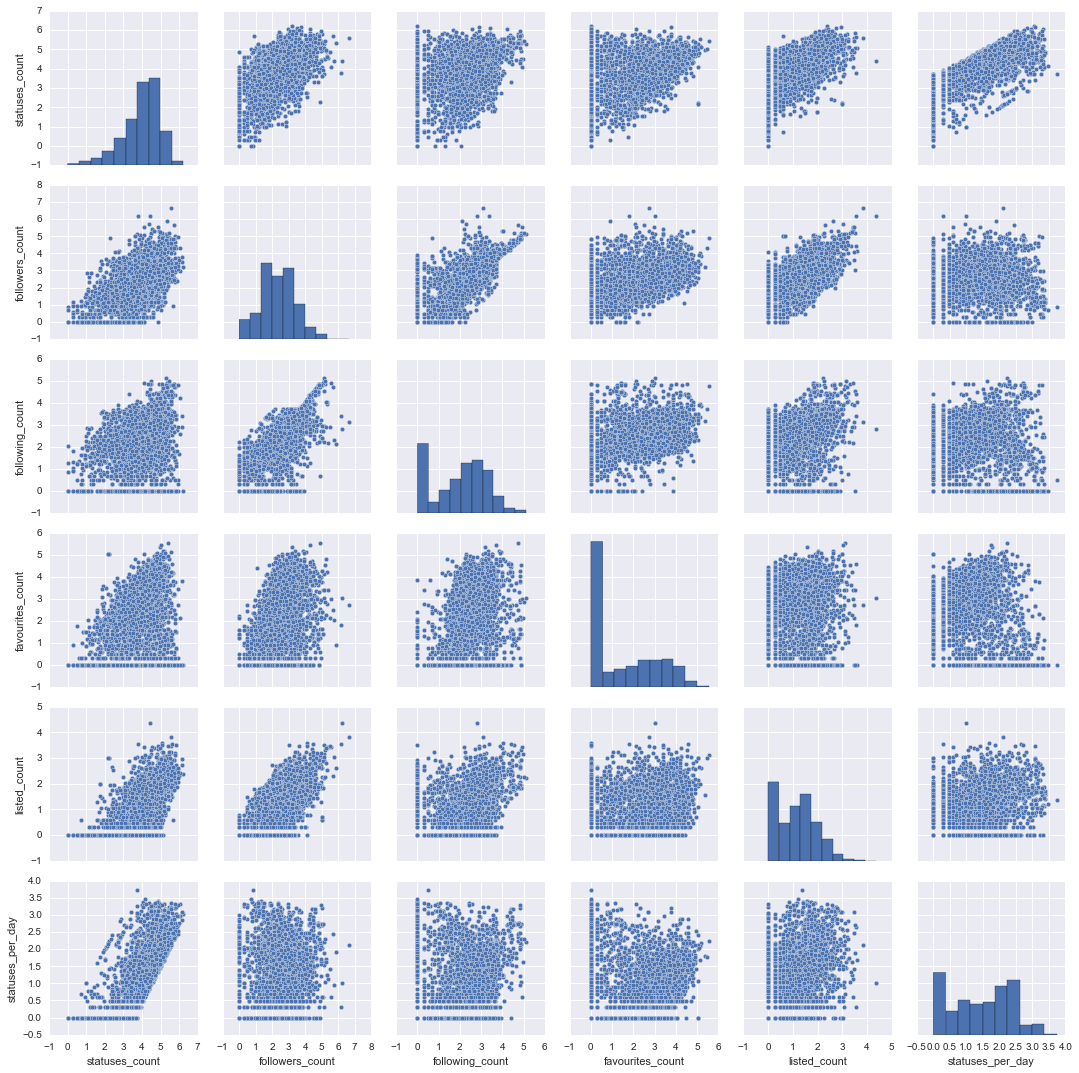

In [212]:
sns.pairplot(log_df.sample(5000));

In [213]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from itertools import cycle
from sklearn import metrics

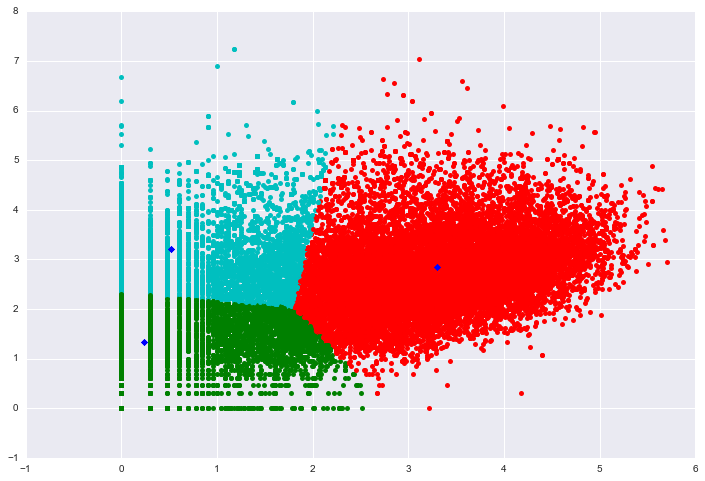

In [214]:
CLUSTER_COUNT = 3

X = log_df[['favourites_count', 'followers_count']].values
# pca = PCA(n_components=2, whiten=True).fit(X)
# X_pca = pca.transform(X)

clf = KMeans(init='k-means++', n_clusters=CLUSTER_COUNT)
# clf = clf.fit(X_pca)

clf = clf.fit(X)

centroids = clf.cluster_centers_
labels = clf.labels_

# print(centroids)
# print(labels)

colors = ["g.","r.","c.","y.", "b.", "k.", "w."]

for i in range(len(X)):
#     print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], 
             X[i][1], 
             colors[labels[i]], 
             markersize = 10)

plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=10, linewidths = 5, zorder = 10)

plt.show()

# target_names = ["c" + str(i + 1) for i in range(CLUSTER_COUNT)]

# colors = cycle('rgbcmykw')
# target_ids = range(len(target_names))
# plt.figure()
# for i, c, label in zip(target_ids, colors, target_names):
#     plt.scatter(X_pca[clf.labels_ == i, 0], X_pca[clf.labels_ == i, 1], c=c, label=label)
# plt.legend()
# plt.show();

In [41]:
CLUSTER_COUNT = 10

for clus in range(2, CLUSTER_COUNT):

    X = scale(log_df[['favourites_count', 'followers_count']])
    # pca = PCA(n_components=2, whiten=True).fit(X)
    # X_pca = pca.transform(X)

    clf = KMeans(init='k-means++', n_clusters=clus)
    # clf = clf.fit(X_pca)

    clf = clf.fit(X)

    centroids = clf.cluster_centers_
    labels = clf.labels_
    print("Clusters " + str(clus))
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(
    X, labels))

Clusters 2
Silhouette Coefficient: 0.481
Clusters 3
Silhouette Coefficient: 0.525
Clusters 4
Silhouette Coefficient: 0.472
Clusters 5
Silhouette Coefficient: 0.453
Clusters 6
Silhouette Coefficient: 0.471
Clusters 7
Silhouette Coefficient: 0.458
Clusters 8
Silhouette Coefficient: 0.471
Clusters 9
Silhouette Coefficient: 0.462


In [55]:
import scipy
import scipy.cluster.vq
import scipy.spatial.distance
dst = scipy.spatial.distance.euclidean

def gap(data, refs=None, nrefs=20, ks=range(1,11)):
    """
    Compute the Gap statistic for an nxm dataset in data.
    Either give a precomputed set of reference distributions in refs as an (n,m,k) scipy array,
    or state the number k of reference distributions in nrefs for automatic generation with a
    uniformed distribution within the bounding box of data.
    Give the list of k-values for which you want to compute the statistic in ks.
    """
    shape = data.shape
    if refs==None:
        tops = data.max(axis=0)
        bots = data.min(axis=0)
        dists = scipy.matrix(scipy.diag(tops-bots))

        rands = scipy.random.random_sample(size=(shape[0],shape[1],nrefs))
        for i in range(nrefs):
            rands[:,:,i] = rands[:,:,i]*dists+bots
    else:
        rands = refs

    gaps = scipy.zeros((len(ks),))
    for (i,k) in enumerate(ks):
        (kmc,kml) = scipy.cluster.vq.kmeans2(data, k)
        disp = sum([dst(data[m,:],kmc[kml[m],:]) for m in range(shape[0])])

        refdisps = scipy.zeros((rands.shape[2],))
        for j in range(rands.shape[2]):
            (kmc,kml) = scipy.cluster.vq.kmeans2(rands[:,:,j], k)
            refdisps[j] = sum([dst(rands[m,:,j],kmc[kml[m],:]) for m in range(shape[0])])
        gaps[i] = scipy.mean(scipy.log(refdisps))-scipy.log(disp)
    return gaps

In [56]:
gap(X)

array([ 2.63452633,  2.6398187 ,  2.54996073,  2.53952835,  2.39816295,
        2.36165418,  2.56411752,  2.21483231,  2.48258204,  2.51464388])